In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = np.array(np.loadtxt("../facultative_cpp/cpp_3_weak/weak_3/weak_3/output.bin"))
data_h = np.array(np.loadtxt("../facultative_cpp/cpp_3_weak/weak_3/weak_3/output_h.bin"))
data = data.transpose()
data_h = data_h.transpose()
t = data[0]
x = data[1]
v = data[2]
E = data[3]

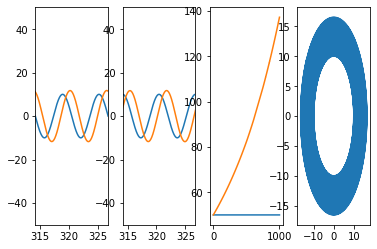

In [18]:
fig, ax = plt.subplots(1, 4)
ax[0].set_ylim(-50 , 50)
ax[1].set_ylim(-50, 50)
ax[0].set_xlim(100 * np.pi , 104 * np.pi)
ax[1].set_xlim(100 * np.pi , 104 * np.pi)
ax[0].plot(t, - x[0] * np.sin(t))
ax[1].plot(t, x[0] * np.cos(t))
ax[2].plot(t, x[0]**2*(t+1)/(t+1)/2)
ax[0].plot(t, v)
ax[1].plot(t, x)
ax[2].plot(t, E)
ax[3].plot(x, v)

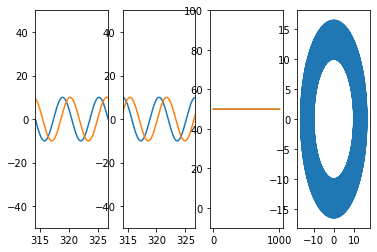

In [14]:
fig, ax = plt.subplots(1, 4)
t_h = data_h[0]
x_h = data_h[1]
v_h = data_h[2]
E_h = data_h[3]
ax[0].set_ylim(-50 , 50)
ax[1].set_ylim(-50, 50)
ax[2].set_ylim(-10, 100)
ax[0].set_xlim(100 * np.pi , 104 * np.pi)
ax[1].set_xlim(100 * np.pi , 104 * np.pi)
ax[0].plot(t_h, - x_h[0] * np.sin(t_h))
ax[1].plot(t_h, x_h[0] * np.cos(t_h))
ax[2].plot(t_h, x_h[0]**2*(t_h+1)/(t_h+1)/2)
ax[0].plot(t_h, v_h)
ax[1].plot(t_h, x_h)
ax[2].plot(t_h, E_h)
ax[3].plot(x, v)

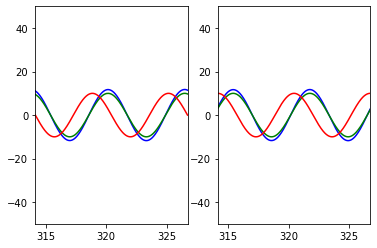

In [9]:
fig, ax = plt.subplots(1, 2)
ax[0].set_ylim(-50 , 50)
ax[1].set_ylim(-50, 50)
ax[0].set_xlim(100 * np.pi , 104 * np.pi)
ax[1].set_xlim(100 * np.pi , 104 * np.pi)
ax[0].plot(t, v, color="b")
ax[1].plot(t, x, color="b")
ax[0].plot(t_h, v_h, color="g")
ax[1].plot(t_h, x_h, color="g")
ax[0].plot(t_h, - x_h[0] * np.sin(t_h), color="r")
ax[1].plot(t_h, x_h[0] * np.cos(t_h), color="r")
